# Equipo 2: Trabajo parcial

## Semana 7
## Curso: Minería de Datos
## Integrantes:
* Blas Ruiz, Luis Aaron - 19200069
* Huarhuachi Ortega, Andrea Mariana - 19200267
* Ramos Rivas, Kevin Keyler - 19200096
* Rojas Villanueva, Paula Elianne - 19200266
* Torres Talaverano, Luz Elena - 19200294

## Información del conjunto de datos
Esta base es respecto a los datos sísmicos las cuales contiene todos los parámetros que caracterizan a un sismo, calculados en las mismas condiciones a fin de constituirse como una base homogénea: fecha, hora, latitud, longitud, profundidad y magnitud.


#### Atributos para el conjunto de datos
* fecha_UTC: Hora universal coordinada (UTC), Es la fecha con cinco horas adelantadas con respecto a la hora local debido a que Peru se encuentra en una zona horaria UTC -5
* hora_UTC: Hora universal coordinada (UTC), cinco horas adelantadas con respecto a la hora local debido a que Peru se encuentra en una zona horaria UTC -5
* latitud(º): Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur
* longitud(º): Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).
* profundidad_km: Profundidad del foco sísmisco por debajo de la superficie

Estas tres columnas luego seran reemplazadas ya que la data nueva del IGP solo posee una columna llamada Magnitud(M)
* magnitud_mb: Magnitud de Ondas de Cuerpo
* magnitud_Ms: Magnitud de Ondas Superficiales
* magnitud_Mw: Magnitud Momento (Corresponde a la cantidad de energía liberada por el sismo)

## Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Leer archivo de datos historicos**

In [2]:
myData = pd.read_csv('https://raw.githubusercontent.com/KevinRamosRivas/G2-MINERIA_DATOS/main/IGP_Datos-Sismicos_1960-2022.csv')

**Información de la data**

In [3]:
myData.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
0,13/01/1960,15:40:34.00,-16.145,-72.144,60,7.5
1,15/01/1960,09:30:24.00,-15.000,-75.000,70,7.0
2,17/01/1960,02:57:58.00,-14.500,-74.500,150,6.4
3,23/01/1960,03:37:32.00,-12.500,-68.500,300,5.8
4,30/01/1960,05:07:24.00,-5.500,-77.500,100,5.7


In [4]:
myData.describe()

,latitud (º),longitud (º),profundidad (km),magnitud (M)
count,23039.000000,23039.000000,23039.000000,23039.000000
mean,-11.357795,-75.710652,71.047354,4.732050
std,4.474994,3.092920,66.371202,0.434126
min,-23.397100,-82.893700,0.000000,3.000000
25%,-15.360900,-77.770000,29.000000,4.500000
50%,-11.699200,-75.751000,48.000000,4.700000
75%,-7.897650,-73.610100,106.000000,4.900000
max,-1.496000,-66.980700,743.000000,8.400000


In [5]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23039 entries, 0 to 23038
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha UTC         23039 non-null  object 
 1   hora UTC          23039 non-null  object 
 2   latitud (º)       23039 non-null  float64
 3   longitud (º)      23039 non-null  float64
 4   profundidad (km)  23039 non-null  int64  
 5   magnitud (M)      23039 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


Escalas de magnitud: https://www.snet.gob.sv/ver/seccion+educativa/sismologia/escalas+de+magnitud/
- magnitud (mb): Magnitud de Ondas de Cuerpo
- magnitud (Ms): Magnitud de Ondas Superficiales
- magnitud (Mw:  Magnitud Momento
- magnitud (M)

## 1. Buscar nulos e imputar con (promedio, moda, regresion)

In [6]:
print(myData.isnull().any())

fecha UTC           False
hora UTC            False
latitud (º)         False
longitud (º)        False
profundidad (km)    False
magnitud (M)        False
dtype: bool


In [7]:
# hallar la cantidad de nulos por columna
myData.isnull().sum()

fecha UTC           0
hora UTC            0
latitud (º)         0
longitud (º)        0
profundidad (km)    0
magnitud (M)        0
dtype: int64

**Ordenando atributos por su tipo**

In [8]:
tipos = myData.columns.to_series().groupby(myData.dtypes).groups

**Listando variables categóricas**

In [9]:
colText = tipos[np.dtype('object')]
print(colText)
print(len(colText))

Index(['fecha UTC', 'hora UTC'], dtype='object')
2


**Listando variables numéricas**

In [10]:
columnas = myData.columns
colNum = list(set(columnas)-set(colText))
print(colNum)
print(len(colNum))

['magnitud (M)', 'latitud (º)', 'profundidad (km)', 'longitud (º)']
4


**Completando valores perdidos en atributos categóricos**

In [11]:
# mode = más frecuente
for c in colText:
    myData[c] = myData[c].replace('-', np.NaN)
    mode = myData[c].mode()[0]
    myData[c] = myData[c].fillna(mode)

**Completamos valores perdidos en atributos numéricos**

In [12]:
# mean = media
for c in colNum:
    mean = myData[c].mean()
    myData[c] = myData[c].fillna(mean)

Después de completar los valores perdidos, observemos si hay todavía nulls

In [13]:
print(myData.isnull().any())

fecha UTC           False
hora UTC            False
latitud (º)         False
longitud (º)        False
profundidad (km)    False
magnitud (M)        False
dtype: bool


In [14]:
myData.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
0,13/01/1960,15:40:34.00,-16.145,-72.144,60,7.5
1,15/01/1960,09:30:24.00,-15.000,-75.000,70,7.0
2,17/01/1960,02:57:58.00,-14.500,-74.500,150,6.4
3,23/01/1960,03:37:32.00,-12.500,-68.500,300,5.8
4,30/01/1960,05:07:24.00,-5.500,-77.500,100,5.7


In [15]:
# ver la cantidad de nulos de magnitud_Ms
myData['magnitud (M)'].isnull().sum()

0

**Exportación del nuevo archivo**

In [16]:
myData.to_csv("IGP_datos_sismicos_1960-2022_V1.csv", index=False)

## 2. Identificación de valores atipicos

In [17]:
myData = pd.read_csv('IGP_datos_sismicos_1960-2022_V1.csv')

<AxesSubplot:>

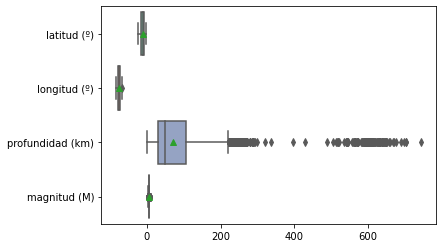

In [18]:
sns.boxplot(data=myData, orient = "h", showmeans = True,palette="Set2")

In [19]:
# eliminar los outliers de la columna profundidad (km)
Q1 = myData['profundidad (km)'].quantile(0.25)
Q3 = myData['profundidad (km)'].quantile(0.75)
IQR = Q3 - Q1
myData = myData[~((myData['profundidad (km)'] < (Q1 - 1.5 * IQR)) |(myData['profundidad (km)'] > (Q3 + 1.5 * IQR)))]
# eliminar los outliers de la columna magnitud (M)
Q1 = myData['magnitud (M)'].quantile(0.25)
Q3 = myData['magnitud (M)'].quantile(0.75)
IQR = Q3 - Q1
myData = myData[~((myData['magnitud (M)'] < (Q1 - 1.5 * IQR)) |(myData['magnitud (M)'] > (Q3 + 1.5 * IQR)))]

<AxesSubplot:>

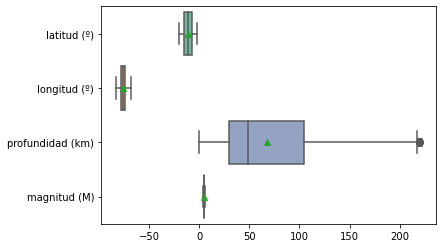

In [20]:
sns.boxplot(data=myData, orient = "h", showmeans = True,palette="Set2")

## 3. Tranformación de datos

Cambiamos el nombre de las columnas para que coincidan con el diccionario de datos del dataset Historico

In [21]:
myData = myData.rename(columns = {'fecha UTC':'fecha_UTC', 'hora UTC':'hora_UTC','latitud (º)':'latitud(º)', 
                         'longitud (º)':'longitud(º)', 'profundidad (km)':'profundidad_km', 'magnitud (M)':'magnitud_Mw'})

Separacion de la columna fecha en dia, mes, año

In [22]:
df_date = myData['fecha_UTC'].str.split('/', expand=True)
df_date = df_date.rename(columns={0:'dia', 1:'mes', 2:'año'})
# convertir a tipo numérico
df_date['dia'] = pd.to_numeric(df_date['dia'], errors='coerce')
df_date['mes'] = pd.to_numeric(df_date['mes'], errors='coerce')
df_date['año'] = pd.to_numeric(df_date['año'], errors='coerce')

In [23]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21257 entries, 5 to 23038
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dia     21257 non-null  int64
 1   mes     21257 non-null  int64
 2   año     21257 non-null  int64
dtypes: int64(3)
memory usage: 664.3 KB


In [24]:
df_sismos = pd.concat([df_date, myData], axis=1)

In [25]:
df_sismos.head()

,dia,mes,año,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_Mw
5,8,2,1960,08/02/1960,19:06:16.00,-8.5,-74.5,136,5.3
9,4,5,1960,04/05/1960,01:28:52.00,-18.0,-71.5,100,5.0
13,19,7,1960,19/07/1960,04:19:14.00,-7.0,-80.0,33,5.3
16,14,9,1960,14/09/1960,00:08:03.00,-15.2,-76.2,91,5.4
18,26,9,1960,26/09/1960,16:58:13.00,-16.0,-72.9,115,5.3


Separacion de hora_UTC en hora, minutos, segundos

In [26]:
# separación de hora_UTC en hora , minuto y segundo
df_hora = df_sismos['hora_UTC'].str.split(':', expand=True)
df_hora = df_hora.rename(columns={0:'hora', 1:'minuto', 2:'segundo'})
# eliminar la columna segundo
df_hora = df_hora.drop(['segundo'], axis=1)
# convertir a tipo numérico
df_hora['hora'] = pd.to_numeric(df_hora['hora'], errors='coerce')
df_hora['minuto'] = pd.to_numeric(df_hora['minuto'], errors='coerce')
df_hora.head()

,hora,minuto
5,19,6
9,1,28
13,4,19
16,0,8
18,16,58


In [27]:
# concatenar las columnas hora, minuto  con df_sismos
df_sismos = pd.concat([df_hora, df_sismos], axis=1)

In [28]:
df_sismos.tail()

,hora,minuto,dia,mes,año,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_Mw
23034,17,39,22,9,2022,22/09/2022,17:39:29,-15.49,-75.46,34,4.4
23035,23,10,22,9,2022,22/09/2022,23:10:03,-8.70,-80.15,18,4.1
23036,1,39,23,9,2022,23/09/2022,01:39:24,-18.43,-71.90,33,4.2
23037,17,58,23,9,2022,23/09/2022,17:58:51,-8.56,-80.20,38,4.3
23038,1,20,26,9,2022,26/09/2022,01:20:47,-9.80,-74.73,133,4.3


In [29]:
df_sismos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21257 entries, 5 to 23038
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hora            21257 non-null  int64  
 1   minuto          21257 non-null  int64  
 2   dia             21257 non-null  int64  
 3   mes             21257 non-null  int64  
 4   año             21257 non-null  int64  
 5   fecha_UTC       21257 non-null  object 
 6   hora_UTC        21257 non-null  object 
 7   latitud(º)      21257 non-null  float64
 8   longitud(º)     21257 non-null  float64
 9   profundidad_km  21257 non-null  int64  
 10  magnitud_Mw     21257 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.9+ MB


In [30]:
# Escalasismos = pd.cut(df_sismos['magnitud_Mw'],[0,3,4,5,6,7,8])
# print(Escalasismos)
# print(pd.value_counts(Escalasismos))

In [31]:
# reiniciar los índices
df_sismos = df_sismos.reset_index(drop=True)

In [32]:
df_sismos.head()

,hora,minuto,dia,mes,año,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_Mw
0,19,6,8,2,1960,08/02/1960,19:06:16.00,-8.5,-74.5,136,5.3
1,1,28,4,5,1960,04/05/1960,01:28:52.00,-18.0,-71.5,100,5.0
2,4,19,19,7,1960,19/07/1960,04:19:14.00,-7.0,-80.0,33,5.3
3,0,8,14,9,1960,14/09/1960,00:08:03.00,-15.2,-76.2,91,5.4
4,16,58,26,9,1960,26/09/1960,16:58:13.00,-16.0,-72.9,115,5.3


In [33]:
df_sismos.shape

(21257, 11)

In [34]:
# # creacion de una nueva columna con el nombre de la region del sismo con geopandas
# # importar librerias
# from geopy.geocoders import Nominatim
# from geopy.point import Point
# # crear un objeto geolocator
# geolocator = Nominatim(user_agent="myGeocoder")

# def reverse_geo(lat, lon):
#   location = geolocator.reverse(Point(lat, lon))
#   try:
#     if location is not None:
#       # agregar la variable location si existe location.raw['address']['region'] y location.raw['address']['state']
#       if 'region' in location.raw['address'] and 'state' in location.raw['address']:
#           print(location.raw['address']['region'])
#           return location.raw['address']['region'] + ', ' + location.raw['address']['state']
#       else:
#           return'MAR, MAR'
#     else:
#           return'MAR, MAR'
#   except:
#     return 'MAR, MAR'

In [35]:
# crear una lista vacia
# region = [reverse_geo(lat, lon) for lat, lon in zip(df_sismos['latitud(º)'][1000:2000], df_sismos['longitud(º)'][1000:2000])]

In [36]:
# # separar la lista region en dos columnas
# df_region = pd.DataFrame(region)
# df_region = df_region[0].str.split(',', expand=True)
# df_region = df_region.rename(columns={0:'provincia', 1:'region'})

In [37]:
# df_region.head()

In [38]:
# #guardar el dataframe en un archivo csv
# df_region.to_csv('region2.csv', index=False)

In [39]:
df_region = pd.read_csv('https://raw.githubusercontent.com/KevinRamosRivas/G2-MINERIA_DATOS/main/region_datos_sismicos_1960-2022.csv')

In [40]:
df_region.shape

(21257, 2)

In [41]:
# concatenar df_region con df_sismos
df_sismos = pd.concat([df_region, df_sismos], axis=1)

In [42]:
df_sismos.head()

,provincia,region,hora,minuto,dia,mes,año,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_Mw
0,Coronel Portillo,Ucayali,19,6,8,2,1960,08/02/1960,19:06:16.00,-8.5,-74.5,136,5.3
1,MAR,MAR,1,28,4,5,1960,04/05/1960,01:28:52.00,-18.0,-71.5,100,5.0
2,MAR,MAR,4,19,19,7,1960,19/07/1960,04:19:14.00,-7.0,-80.0,33,5.3
3,MAR,MAR,0,8,14,9,1960,14/09/1960,00:08:03.00,-15.2,-76.2,91,5.4
4,Condesuyos,Arequipa,16,58,26,9,1960,26/09/1960,16:58:13.00,-16.0,-72.9,115,5.3


## 4. Reducción de dimensionalidad

Seleccionamos aquellos con una magnitud superior a 3.0 por el nivel de riesgo que representan

In [43]:
df_sismos= df_sismos[(df_sismos['magnitud_Mw']>=3.0)]

In [44]:
df_sismos.head()

,provincia,region,hora,minuto,dia,mes,año,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_Mw
0,Coronel Portillo,Ucayali,19,6,8,2,1960,08/02/1960,19:06:16.00,-8.5,-74.5,136,5.3
1,MAR,MAR,1,28,4,5,1960,04/05/1960,01:28:52.00,-18.0,-71.5,100,5.0
2,MAR,MAR,4,19,19,7,1960,19/07/1960,04:19:14.00,-7.0,-80.0,33,5.3
3,MAR,MAR,0,8,14,9,1960,14/09/1960,00:08:03.00,-15.2,-76.2,91,5.4
4,Condesuyos,Arequipa,16,58,26,9,1960,26/09/1960,16:58:13.00,-16.0,-72.9,115,5.3


In [45]:
# eliminamos las columnas que no vamos a utilizar
df_sismos = df_sismos.drop(['fecha_UTC','hora_UTC'], axis=1)
df_sismos.head()

,provincia,region,hora,minuto,dia,mes,año,latitud(º),longitud(º),profundidad_km,magnitud_Mw
0,Coronel Portillo,Ucayali,19,6,8,2,1960,-8.5,-74.5,136,5.3
1,MAR,MAR,1,28,4,5,1960,-18.0,-71.5,100,5.0
2,MAR,MAR,4,19,19,7,1960,-7.0,-80.0,33,5.3
3,MAR,MAR,0,8,14,9,1960,-15.2,-76.2,91,5.4
4,Condesuyos,Arequipa,16,58,26,9,1960,-16.0,-72.9,115,5.3


### Aplicamos ANOVA para los datos categoricos y asi seleccionar los mejores atributos en base a la variable objetivo

In [46]:
X=df_sismos.iloc[:,:-1]
Y=df_sismos["magnitud_Mw"]

In [47]:
# extraer las columnas de tipo object de X
df_string = X.select_dtypes(include=['object'])

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
# Preparacion
def prepare_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_enc = oe.transform(X)
    return X_enc


In [49]:
#Preparamos la entradas
X_train_enc= prepare_inputs(df_string)
# convertir a dataframe
X_train_enc = pd.DataFrame(X_train_enc)

from sklearn import preprocessing

df_string_z_score=pd.DataFrame(preprocessing.scale(X_train_enc),columns=df_string .columns)
df_string_z_score

,provincia,region
0,-1.051950,1.773509
1,0.289521,0.285065
2,0.289521,0.285065
3,0.289521,0.285065
4,-1.149511,-1.699527
...,...,...
21252,0.289521,0.285065
21253,0.289521,0.285065
21254,0.289521,0.285065
21255,0.289521,0.285065


In [50]:
# hacer el filtro ANOVA para seleccionar las variables más importantes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# seleccionar las 5 variables más importantes
selectKBest = SelectKBest(f_regression, k=2)
# aplicar el filtro
selectKBest.fit(df_string_z_score, Y)
# obtener los scores
scores = selectKBest.scores_
# obtener los p-values
pvalues = selectKBest.pvalues_
# obtener los nombres de las columnas
names = df_string_z_score.columns
# crear un dataframe con los resultados
df_scores = pd.DataFrame({'score':scores, 'pvalue':pvalues}, index=names)
# ordenar el dataframe por el score ascendente
df_scores.sort_values(by='score', ascending=False)

,score,pvalue
region,33.675125,6.605343e-09
provincia,8.002503,4.675645e-03


<AxesSubplot:>

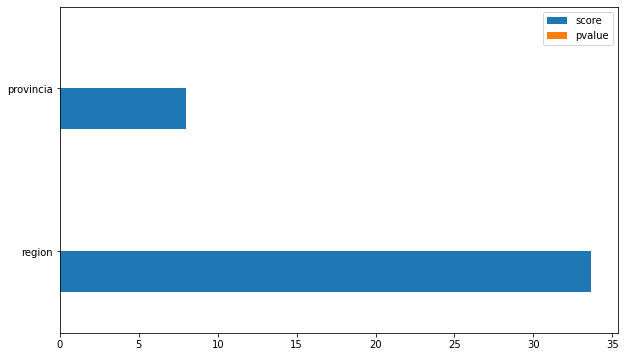

In [51]:
# generar una grafica de barras con los scores en orden ascendente
df_scores.sort_values(by='score', ascending=False).plot(kind='barh', figsize=(10, 6))

### Aplicamos filtro anova para los datos numericos y asi seleccionar los atributos mas relevantes

In [52]:
X.head()

,provincia,region,hora,minuto,dia,mes,año,latitud(º),longitud(º),profundidad_km
0,Coronel Portillo,Ucayali,19,6,8,2,1960,-8.5,-74.5,136
1,MAR,MAR,1,28,4,5,1960,-18.0,-71.5,100
2,MAR,MAR,4,19,19,7,1960,-7.0,-80.0,33
3,MAR,MAR,0,8,14,9,1960,-15.2,-76.2,91
4,Condesuyos,Arequipa,16,58,26,9,1960,-16.0,-72.9,115


In [53]:
Y.head()

0    5.3
1    5.0
2    5.3
3    5.4
4    5.3
Name: magnitud_Mw, dtype: float64

In [54]:
# separamos por tipo de datos
df_num = X.select_dtypes(include=['int64','float64'])
df_num.head()

,hora,minuto,dia,mes,año,latitud(º),longitud(º),profundidad_km
0,19,6,8,2,1960,-8.5,-74.5,136
1,1,28,4,5,1960,-18.0,-71.5,100
2,4,19,19,7,1960,-7.0,-80.0,33
3,0,8,14,9,1960,-15.2,-76.2,91
4,16,58,26,9,1960,-16.0,-72.9,115


In [55]:
from sklearn import preprocessing

df_num_z_score=pd.DataFrame(preprocessing.scale(df_num),columns=df_num.columns)
df_num_z_score

,hora,minuto,dia,mes,año,latitud(º),longitud(º),profundidad_km
0,1.188040,-1.353646,-0.880713,-1.334492,-2.963739,0.615431,0.442217,1.366370
1,-1.436663,-0.084041,-1.336310,-0.466592,-2.963739,-1.506418,1.430075,0.645442
2,-0.999213,-0.603425,0.372181,0.112007,-2.963739,0.950459,-1.368855,-0.696287
3,-1.582480,-1.238227,-0.197316,0.690607,-2.963739,-0.881031,-0.117569,0.465209
4,0.750589,1.647240,1.169477,0.690607,-2.963739,-1.059713,0.969075,0.945829
...,...,...,...,...,...,...,...,...
21252,0.896406,0.550762,0.713880,0.690607,1.365639,-0.945803,0.126103,-0.676261
21253,1.771308,-1.122809,0.713880,0.690607,1.365639,0.570760,-1.418248,-0.996674
21254,-1.436663,0.550762,0.827779,0.690607,1.365639,-1.602459,1.298361,-0.696287
21255,0.896406,1.647240,0.827779,0.690607,1.365639,0.602030,-1.434713,-0.596158


In [56]:
# hacer el filtro ANOVA para seleccionar las variables más importantes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# seleccionar las 5 variables más importantes
selectKBest = SelectKBest(f_regression, k=8)
# aplicar el filtro
selectKBest.fit(df_num_z_score, Y)
# obtener los scores
scores = selectKBest.scores_
# obtener los p-values
pvalues = selectKBest.pvalues_
# obtener los nombres de las columnas
names = df_num_z_score.columns
# crear un dataframe con los resultados
df_scores = pd.DataFrame({'score':scores, 'pvalue':pvalues}, index=names)
# ordenar el dataframe por el score ascendente
df_scores.sort_values(by='score', ascending=False)

,score,pvalue
año,3625.357855,0.000000
hora,22.182612,0.000002
latitud(º),21.256508,0.000004
longitud(º),10.517019,0.001185
mes,5.137578,0.023423
dia,3.025986,0.081955
profundidad_km,0.747416,0.387305
minuto,0.256048,0.612854


<AxesSubplot:>

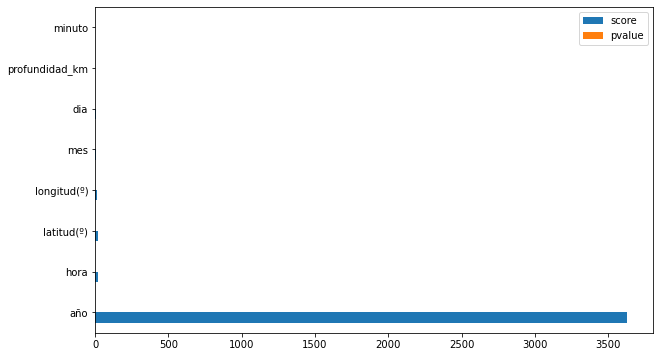

In [57]:
# generar una grafica de barras con los scores en orden ascendente
df_scores.sort_values(by='score', ascending=False).plot(kind='barh', figsize=(10, 6))

<AxesSubplot:>

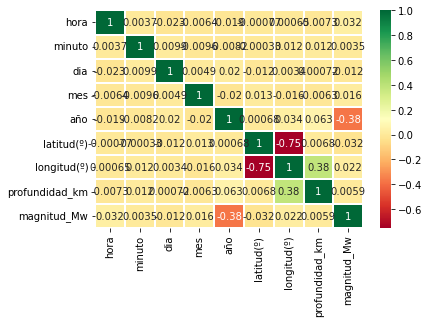

In [58]:
# ver la correlación entre las variables con un mapa de calor
sns.heatmap(df_sismos.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

In [59]:
# eliminamos las columnas minuto , dia y hora que no son importantes
df_sismos = df_sismos.drop(['minuto','dia','hora'], axis=1)
df_sismos.head()

,provincia,region,mes,año,latitud(º),longitud(º),profundidad_km,magnitud_Mw
0,Coronel Portillo,Ucayali,2,1960,-8.5,-74.5,136,5.3
1,MAR,MAR,5,1960,-18.0,-71.5,100,5.0
2,MAR,MAR,7,1960,-7.0,-80.0,33,5.3
3,MAR,MAR,9,1960,-15.2,-76.2,91,5.4
4,Condesuyos,Arequipa,9,1960,-16.0,-72.9,115,5.3


In [60]:
# eliminamos la columna provincia que no es importante
# df_sismos = df_sismos.drop(['provincia'], axis=1)
# df_sismos.head()

In [61]:
# eliminamos los espacios en blanco de la columna region
df_sismos['region'] = df_sismos['region'].str.strip()

In [62]:
# seleccionar los sismos que ocurrieron en la region de Lima
df_sismos = df_sismos[df_sismos['region']=='Lima']

In [63]:
# redondear la magnitud a 2 decimales
df_sismos['magnitud_Mw'] = df_sismos['magnitud_Mw'].round(2)

In [64]:
# guardamos el archivo en formato csv
df_sismos.to_csv("IGP_Datos-Sismicos_1960-2022_V2.csv", index=False)

### ¡FIN TRABAJO!